## <center> Forest-ECOC Method for Multi-Class Problems : 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Load and Prepare data : 

In [205]:
data = np.loadtxt("./data4.csv", delimiter=',')

In [206]:
data[:4]

array([[1.        , 2.77956621, 1.44049964, 3.        ],
       [1.        , 2.91513431, 1.04450477, 3.        ],
       [1.        , 0.94315922, 1.9768344 , 0.        ],
       [1.        , 1.96567361, 3.85054774, 1.        ]])

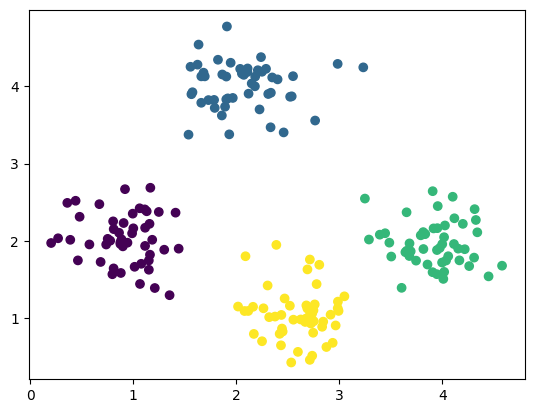

In [208]:
plt.scatter(data[:, 1], data[:, 2], c=data[:, 3])

## Build The Perceptron Model : 

In [228]:
class Perceptron:
    def __init__(self, name ="Perceptron"):
        self.w : np.ndarray 
        self.lossHist : list = []
        self.name = name
        self.ls : float = 0
        self.Tmax = 2000

    def fit(self, X, y, verbose=True):
        m , d = X.shape
        self.w = np.random.rand(d)
        self.lossHist.append(self.loss(X, y))
        self.ls = self.loss(X, y)
        
        t = 0
        
        while(self.ls != 0 and t < self.Tmax):
            for i, xi in enumerate(X):
                if self.hs(xi)*y[i] < 0: 
                    self.w += y[i] * xi
                    self.ls = self.loss(X, y)

                t += 1    
                if t%10 ==0:
                    self.lossHist.append(self.ls)
                    if verbose:
                        print(f"iter : {t} ,loss : {self.ls}")
                    if self.ls == 0: break

    def val_data(self, X, y, first=True):

        yp = y.copy()
        
        c1 = np.unique(yp)[0]

        if first:
            yp = np.where(yp==c1, -1, 1)
        else:
            yp = np.where(yp==c1, 1, -1)

        return X, yp

    def plot_fitted(self, X, y, tmax=4):
        t = np.linspace(0, tmax, 100)
        y_line = - (self.w[0] + t * self.w[1])/self.w[2] 
        #plt.scatter(X[:, 1], X[:, 2], marker="o", c=y, color)
        plt.plot(t, y_line)
    
    def predict(self, x):
        return self.hs(x)
                
    def loss(self, X, y):
        return (1/len(X)) * sum(0 if self.hs(xi) == y[i] else 1 for i, xi in enumerate(X))

    def hs(self, xi):
        return np.sign(self.w @ xi)

    def __repr__(self):
        return f"{self.name}()"

    def summary(self):
        print(f"======== {self.name} model summary : ", "="*50)
        print(f" weights : {self.w}")
        print(f" loss : {self.ls}")
        print(f"\nplot the loss : ")
        plt.plot(range(0, len(self.lossHist)), self.lossHist) 

### Train model method : 

This method is used for train the `Perceptron` model, for each time we specify the `cls1`argument and `cls2`, see the following figure.

In [229]:
data1 = np.copy(data)

In [230]:
data1[: , 3][data1[:, 3] == 3] = -1

In [276]:
classifiers = []
def train_model(data, cls1, cls2, verbose=False, plot=False):
    per = Perceptron()

    datatmp = np.copy(data)

    for i in cls1:
        datatmp[:, 3][datatmp[:, 3]==i] = -1
    
    for i in cls2:
        datatmp[:, 3][datatmp[:, 3]==i] = 1

    X, y = datatmp[:, :3], datatmp[:, 3]

    per.fit(X, y, verbose)

    if plot:
        per.plot_fitted(X, y)
        plt.scatter(X[:, 1], X[:, 2], c=y)

    return per

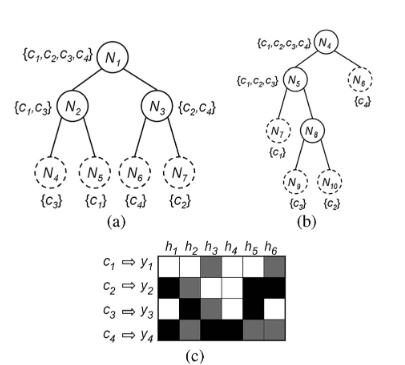

The code length is depend on two coefficients : $N_c$ and $T$, where $N_c$ number of classes and $T$ number of optimal tree you want to use, in our case we choose $T = 2$.

So the code length $n$ geven $N_c$ and $T$ is given by :  $$ n = \frac{(N_c -1).T}{2} $$ 

our case we have 

$$ \begin{equation}
\left\{\begin{split}
 N_c = 4 \\
 T = 2 \\ 
\end{split}\right.
 \end{equation} \hspace{1.5cm} \Longrightarrow \hspace{0.5cm} n = \frac{3.2}{2} = \frac{6}{2} = 3
$$

### Calculate $\hspace{0.5cm} h_1 \hspace{0.5cm} \rightarrow \hspace{0.5cm} h_6$

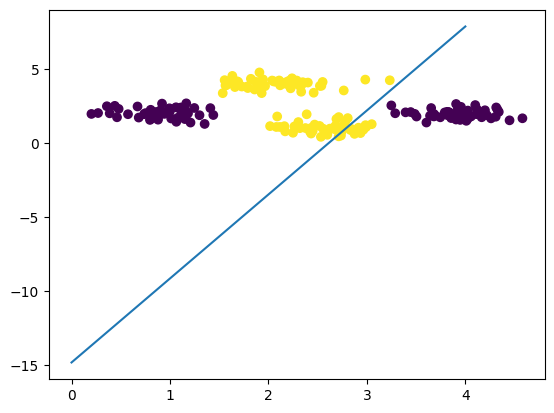

In [277]:
h1 = train_model(data, [0, 2], [1, 3], plot=True)

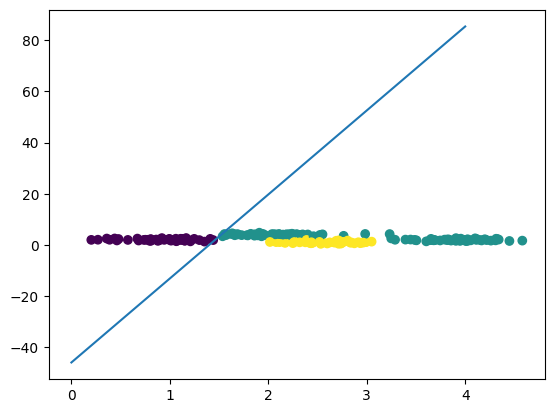

In [278]:
h2 = train_model(data, [0], [2], plot=True)

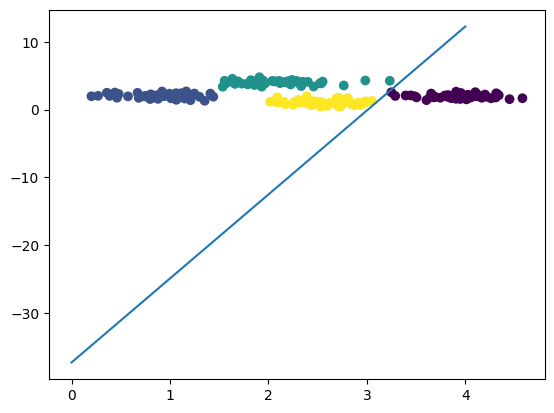

In [279]:
h3 = train_model(data, [2] , [4], plot=True)

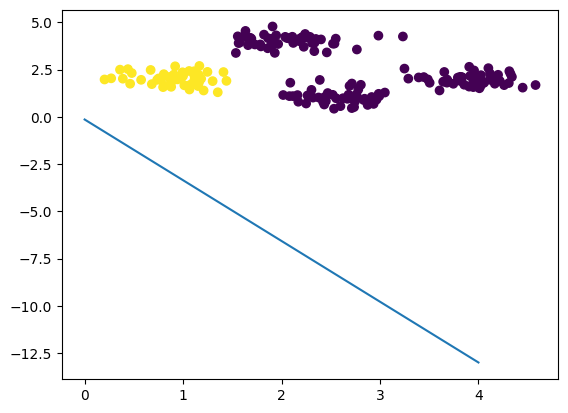

In [280]:
h4 = train_model(data, [1, 2, 3], [4], plot=True)

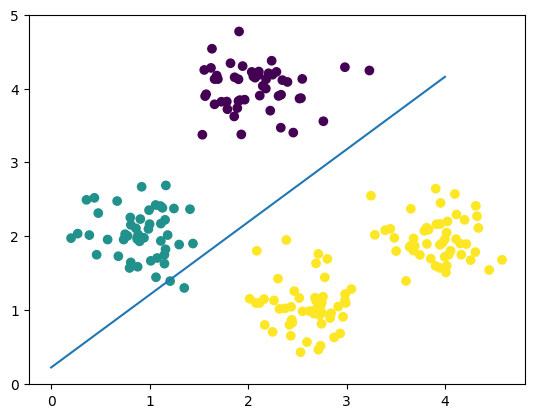

In [281]:
h5 = train_model(data, [1] , [2, 3], plot=True)

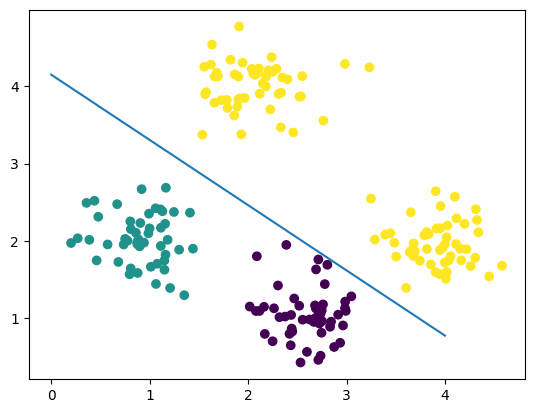

In [282]:
h6 = train_model(data, [3], [2], plot=True)

### Calculate The Weight Matrix $W$ : 

In [283]:
W = np.array([per.w for per in [h1, h2, h3, h4, h5, h6]])

In [284]:
W

array([[ -5.43447872,   2.08126998,  -0.36690605],
       [-13.04410066,   9.32036518,  -0.28374608],
       [ 39.06725841, -12.97777521,   1.04832489],
       [ -0.11130148,  -2.47307868,  -0.76977021],
       [  1.65147876,   7.45343155,  -7.56231658],
       [-25.99488537,   5.28790038,   6.26043778]])

### Get Predictions : 

In [285]:
codewords = np.sign(data[:, :3] @ W.T)

In [286]:
codewords

array([[-1.,  1.,  1., -1.,  1., -1.],
       [ 1.,  1.,  1., -1.,  1., -1.],
       [-1., -1.,  1., -1., -1., -1.],
       ...,
       [-1., -1.,  1., -1., -1., -1.],
       [-1.,  1.,  1., -1.,  1., -1.],
       [-1., -1.,  1., -1., -1., -1.]])

### Define The Enclienne Norm :  

The Enclienne norm is defined as : 

$$ E_d(x, y) = \sqrt{\sum_{i=1}^{n} (y_i - x_i)^2} $$

In [287]:
def Ed(x, y):
    return np.sqrt(np.sum((x-y)**2))

## Decoding using the Encliedienne Formula : 

In [288]:
def decode(codewords):

    Mc = np.array([[1, 1, 0, 1, 1, 0],
                  [-1, 0, 1,-1, -1, -1],
                  [1, -1, 0, 1, -1, 1],
                  [-1, 0, -1, -1, 0, 0]])

    classe_min = 0

    pred_decoded = []

    for word in codewords:
        dmin = float('+inf')

        for classe in range(len(Mc)):

            d = ED(word, Mc[classe])

            if(d <= dmin):
                dmin = d
                classe_min = classe

        pred_decoded.append(classe_min)
                
    return pred_decoded    

In [289]:
pred_decoded = decode(codewords)

In [290]:
print("Accuracy of our method is : ", np.sum(pred_decoded == data[:, 3]), "%")

Accuracy of our method is :  50 %
